# Basic use of scikit-learn

## Loading pre-formated data

In [1]:
# load the IRIS dataset
from sklearn.datasets import load_iris
irisData=load_iris()
# get info on the dataset
#print(irisData.data)
print(irisData.target)
print(irisData.target_names)
print(irisData.feature_names)
#print(irisData.DESCR)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Q1:** What type of machine learning problem is that?

Your answer: On est dans le cas d'un apprentissage supervisé, car on connait les différentes classes.

**Q2:** How many features are there? What kind of features?

Il y a 4 attributs numériques. 

## Plotting parts of the data

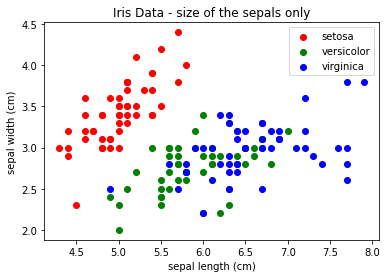

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt # replace the name "pyplot" by "plt" 
X=irisData.data
y=irisData.target
xi=0
yi=1

colors=["red","green","blue"] # associate a color to each class label
for num_label in range(3): # for each label
        plt.scatter(X[y==num_label][:, xi],X[y==num_label][:,yi],color=colors[num_label],label=irisData.target_names[num_label])
plt.legend()
plt.xlabel(irisData.feature_names[xi]) 
plt.ylabel(irisData.feature_names[yi])
plt.title("Iris Data - size of the sepals only") 
plt.show()

**Q3:** From the previous visualisation, what can you predict about the difficulty of this dataset?

On voit que la classe setosa est bien séparée des deux autres classes, mais il est difficile de distinguer la classe versicolor de la classe virginica en considérant seulement ces deux attributs. 

## Classifying with kNN

In [3]:
from sklearn import neighbors
nb_neighb = 15
clf = neighbors.KNeighborsClassifier(nb_neighb) # to know more about the parameters, type help(neighbors.KNeighborsClassifier)


clf.fit(X, y) # training
print('accuracy on X is',clf.score(X,y))

# to predict on a specific example
print('class predicted is',clf.predict([[ 5.4, 3.2, 1.6, 0.4]]))
print('proba of each class is',clf.predict_proba([[ 5.4, 3.2, 1.6, 0.4]]))

y_pred = clf.predict(X)
print('misclassified training examples are:',X[y_pred!=y])

accuracy on X is 0.9866666666666667
class predicted is [0]
proba of each class is [[1. 0. 0.]]
misclassified training examples are: [[6.  2.7 5.1 1.6]
 [4.9 2.5 4.5 1.7]]


**Q4:** What kind of problem do you see with the evaluation?

On évalue ici le classifieur avec l'ensemble qui a servi à l'entrainer, et non un ensemble d'évaluation.

## About training and test sets

if we want a test set and a training set, we can split the data

In [4]:
X_train, y_train = X[0:100], y[0:100] # 100 examples for training
X_test, y_test = X[100:], y[100:] # rest for testing

**Q5:** Explain why it is a really bad idea to split this iris dataset as we've done.

Les données sont triées selon leur classe. On risque en séparant les données ainsi de ne pas bénéficier d'exemples de certaines classes pour construire le classifieur, et on aurait un ensemble d'évaluation ne contenant que des exemples appartenant à une seule classe. Il faudrait d'abord mélanger les données. 

here is a much better way to split the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split 
import random # to generate random numbers

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=random.seed()) # if needed: help(train_test_split)
print('size of train / test = ',len(X_train), len(X_test))
print('nb of training data with class 0/1/2 =', len(X_train[y_train==0]) ,len(X_train[y_train==1]), len(X_train[y_train==2]))

clf=clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n',cm)

print(2/(12+16+15+2))

size of train / test =  105 45
nb of training data with class 0/1/2 = 36 34 35
Confusion matrix
 [[14  0  0]
 [ 0 15  1]
 [ 0  0 15]]
0.044444444444444446


**Q6:** What is on the diagonal of the confusion matrix?

Il s'agit des objets bien classés. 

**Q7:** What is the real error rate (give details)?

L'erreur réelle est nombre d'exemples mal classés sur le nombre d'objets. Ici $err=\frac{2}{12+16+15+2}=0.0444=4.44\%$


One can prefer cross-fold validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

nb_folds = 10
kf=KFold(n_splits=nb_folds,shuffle=True)
score=0
for training_ind,test_ind in kf.split(X):
    #print("training index: ",training_ind,"\ntest index:",test_ind,'\n') 
    X_train=X[training_ind]
    y_train=y[training_ind]
    clf.fit(X_train, y_train)
    X_test=X[test_ind]
    y_test=y[test_ind]
    y_pred = clf.predict(X_test)
    score = score + accuracy_score(y_pred,y_test)
print('average accuracy:',score/nb_folds)

average accuracy: 0.9666666666666668


or as a one-liner:

In [7]:
from sklearn.model_selection import cross_val_score
t_scores = cross_val_score(clf, X, y, cv=10)
print(t_scores.mean())

0.9733333333333334


# Decision tree

In [8]:
# we will use another dataset (a CSV file). Pandas helps us to read this type of file.

import pandas as pd

data = 'heart.csv'
df = pd.read_csv(data)


X = df.drop(columns=['target'])
y = df['target']


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

features = X.columns
classes = ['Not heart disease','heart disease']

print (features)

df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
from sklearn import tree
from graphviz import Source

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=20,criterion='entropy')
clf.fit(X_train, y_train)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=features,
                                    class_names=classes,
                                    filled=True, rounded=True))
graph

ModuleNotFoundError: No module named 'graphviz'

If Graphviz is not working with your setup, look at http://people.irisa.fr/Vincent.Claveau/cours/fd/TP1.html

**Q8:** Explain each line displayed in the nodes/leaves of the tree.

La première ligne représente le sélecteur, la deuxième correspond au calcul d'entropie associé à ce sélecteur. La 3ème ligne correspond au nombre d'exemples présents dans le noeud. Dans values, on a à gauche les exemples classés dans no_heart_disease, et à gauche ceux de la classe heart_disease. Enfin, class représente la classe majoritaire dans le noeud. 
    
**Q9:** What is the name of this decision tree according to the course?
 
 C'est un Tmax

Here is another nice viz of the decision tree. (The dtreeviz package is available in github. It can be installed with 'pip install dtreeviz'. It requires graphviz to be installed.)

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

graph = dtreeviz(clf, X_train, y_train,
                target_name="target",
                feature_names=features,
                class_names=classes
                )

graph


**Q10:** Explain what are the histograms displayed.

Il s'agit des différentes valeurs prises pour les individus présents dans le noeud, pour le sélecteur correspondant.

**Q11** From the sklearn manual, explain what effect max_depth or min_samples_split will have on the decision tree. If time permits, show the effects experimentally.

max_depth permet de contrôler la hauteur de l'arbre, et min_samples le nombre d'exemples nécessaires pour séparer un noeud. On évite ainsi le sur-apprentissage.

### Pruning Tmax

(from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

Here, we use a critrion called "Cost Complexity". Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

In [ ]:
# For each alpha we will append our model to a list
t_clf = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    t_clf.append(clf)
    
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
t_clf = t_clf[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in t_clf]
depth = [clf.tree_.max_depth for clf in t_clf]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.title('Tree complexity vs alpha')
plt.show()


# accuracy versus alpha
train_acc = []
val_acc = []
for c in t_clf:
    y_train_pred = c.predict(X_train)
    y_val_pred = c.predict(X_val)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    val_acc.append(accuracy_score(y_val_pred,y_val))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,val_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

**Q12:** from the graph above, what is the best value for alpha. Replace it in the first line below.

La meilleure valeur pour alpha est 0.02, puisque c'est celle qui permet de minimiser l'erreur réelle. 

In [ ]:
best_alpha = 0.02 # <-- replace this value
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_val_pred = clf_.predict(X_val)

print('Train score', accuracy_score(y_train_pred,y_train))
print(confusion_matrix(y_train_pred,y_train))

print('Validation score', accuracy_score(y_val_pred,y_val))
print(confusion_matrix(y_val_pred,y_val))

# Bayesian learning

Scikit learn implements several variants of Bayesian learning, based on different assumptions about the data https://scikit-learn.org/stable/modules/naive_bayes.html

In [ ]:
import pandas as pd

data = 'weather.nominal.csv'
df = pd.read_csv(data)

data2 = 'weather.csv'
df2 = pd.read_csv(data2)

df2.head()

**Q13:** Let us consider the weather_nominal dataset. What is the type of each feature?

outlook, temperature, et humidity sont des attributs symboliques et windy est un attribut booléen

In [ ]:
X_train = df.drop(columns=['play'])
y_train = df['play']

features = X_train.columns
classes = ['no play','play']

# we must convert the nominal features into integers
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)


In [ ]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB().fit(X_train,y_train)

y_train_pred = clf.predict(X_train)

print('Train score',accuracy_score(y_train_pred,y_train))
print(confusion_matrix(y_train_pred,y_train))

**Q14:** Explain what is displayed by the two following code lines and link that wth what you've seen dutring the course. Do these figures corresponds to what you get when doing it by yourself (explain)?

class_log_prior correspond au log de la probabilité à priori <br>
feature_log_prob_ correspond au log de la probabilité à posteriori.

In [ ]:
print(clf.class_log_prior_)
print(clf.feature_log_prob_)

**Q15:** Let's consider the weather.csv dataset now. Explain what is the difference with the previous one.

weather.csv a des attributs numériques au lieu d'attributs symboliques.


**Q16:** Compute 'by hand' the a posteriori proba of each class for the following data sample P(play=0|x=\['sunny',73,81,'TRUE'\]) and  P(play=1|x=\['sunny',73,81,'TRUE'\]) :

In [ ]:
X_test = [ ['sunny',73,81,'TRUE'] ]


In [ ]:
X_train_num = df2.drop(columns=['play'])

print(X_train_num)
print(y_train)

Nbw0=0 #Nombre d'éléments de la classe 0
Nbw1=0 #Nombre d'éléments de la classe 1
for i in y_train:
    if i==0:
        Nbw0+=1
    else:
        Nbw1+=1


On fait l'hypothèse que les classes sont équiprobables, donc P(w=0)=P(w=1)=1/2

Pour calculer les probabilités a priori, on se place sous l'hypothèse naïve. On considère donc que les attributs sont indépendants. 

On a donc P(x|w=0)=P(outlook='sunny'|w=0) * P(temperature=73|w=0) * P(humidity=81|w=0) * P(windy='True'|w=0)

De même pour P(x|w=1)

In [ ]:
#P(outlook='sunny'|w=0) et P(outlook='sunny'|w=1)
POutlook0=0
POutlook1=0
for i in range(len(X_train_num)):
    if X_train_num['outlook'][i]=='sunny':
        if y_train[i]==0:
            POutlook0+=1
        else:
            POutlook1+=1
            
POutlook0=POutlook0/Nbw0
POutlook1=POutlook1/Nbw1

print("P(outlook='sunny'|play=0) : "+str(POutlook0))
print("P(outlook='sunny'|play=1) : "+str(POutlook1))

#P(windy='True'|w=0) et P(windy='True'|w=1)
PWindy0=0
PWindy1=0

for i in range(len(X_train_num)):
    if X_train_num['windy'][i]==True:
        if y_train[i]==0:
            PWindy0+=1
        else:
            PWindy1+=1
            
PWindy0=PWindy0/Nbw0
PWindy1=PWindy1/Nbw1    

print("P(windy='True'|play=0) : "+str(PWindy0))
print("P(windy='True'|play=1) : "+str(PWindy1))

In [ ]:
import statistics
import math

#P(temperature='73'|w=0) et P(temperature='73'|w=1)
vals_temp0=[]
vals_temp1=[]

for i in range(len(X_train_num)):
    if y_train[i]==0:
        vals_temp0.append(X_train_num['temperature'][i])
    else:
        vals_temp1.append(X_train_num['temperature'][i])
        
sigma_temp0 = statistics.pstdev(vals_temp0)
sigma_temp1 = statistics.pstdev(vals_temp1)
mean_temp0 = statistics.mean(vals_temp0)
mean_temp1 = statistics.mean(vals_temp1)


PTemp0=(1/math.sqrt(2*math.pi*(sigma_temp0**2)))*math.exp(-(73-mean_temp0)**2/(2*sigma_temp0**2))
PTemp1=(1/math.sqrt(2*math.pi*(sigma_temp1**2)))*math.exp(-(73-mean_temp1)**2/(2*sigma_temp1**2))

print("P(temperature=73|play=0) : "+str(PTemp0))
print("P(temperature=73|play=1) : "+str(PTemp1))

#P(humidity='81'|w=0) et P(humidity='81'|w=1)
vals_hum0=[]
vals_hum1=[]

for i in range(len(X_train_num)):
    if y_train[i]==0:
        vals_hum0.append(X_train_num['humidity'][i])
    else:
        vals_hum1.append(X_train_num['humidity'][i])
        
sigma_hum0 = statistics.pstdev(vals_hum0)
sigma_hum1 = statistics.pstdev(vals_hum1)
mean_hum0 = statistics.mean(vals_hum0)
mean_hum1 = statistics.mean(vals_hum1)


PHum0=(1/math.sqrt(2*math.pi*(sigma_hum0**2)))*math.exp(-(73-mean_hum0)**2/(2*sigma_hum0**2))
PHum1=(1/math.sqrt(2*math.pi*(sigma_hum1**2)))*math.exp(-(73-mean_hum1)**2/(2*sigma_hum1**2))

print("P(humidity=81|play=0) : "+str(PHum0))
print("P(humidity=81|play=1) : "+str(PHum1))

In [ ]:
#Probabilité à posteriori : 
PPosteriori0 = POutlook0*PTemp0*PHum0*PWindy0
PPosteriori1 = POutlook1*PTemp1*PHum1*PWindy1

print("P(x=['sunny',73,81,'True']|play=0) : "+str(PPosteriori0))
print("P(x=['sunny',73,81,'True']|play=1) : "+str(PPosteriori1))

#Calcul de P(x)
#P(x)=P(x|w=0)P(w=0)+P(x|w=1)P(w=1)

Px=PPosteriori0*(1/2) + PPosteriori1*(1/2)


#Calcul de P(play=0|x=['sunny',73,81,'TRUE'])  P(play=1|x=['sunny',73,81,'TRUE'])

Proba0=((1/2)*PPosteriori0)/Px
Proba1=((1/2)*PPosteriori1)/Px

print("P(play=0|x=['sunny',73,81,'True']) : "+str(Proba0))
print("P(play=1|x=['sunny',73,81,'True']) : "+str(Proba1))


P(play=0|x=['sunny',73,81,'True']) > P(play=1|x=['sunny',73,81,'True'])

On considère donc que le point x appartient à la classe 0.